# Example of the usage of triadgraph
This is source code of triad transfer analysis in Ref. [1]. The sample data is used from plasma turbulence simulation in Ref. [2]

### References  
[1] S. Maeyama, M. Sasaki, K. Fujii, T. Kobayashi, R. O. Dendy, Y. Kawachi, H. Arakawa, S. Inagaki, New J. Phys., in press (2021). [doi:10.1088/1367-2630/abeffc](https://doi.org/10.1088/1367-2630/abeffc) 
[2] M. Sasaki, T. Kobayashi, R. O. Dendy, Y. Kawachi, H. Arakawa, S. Inagaki, Plasma Phys. Control. Fusion 63, 025004 (2020).

In [1]:
# %load_ext autoreload
# %autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from triadgraph import symmetrize_triadtransfer, directional_triadtransfer, \
                       triadgraph_symmetric_kpq, triadgraph_symmetric_all, \
                       triadgraph_directional_kpq, triadgraph_directional_all, \
                       triadgraph_mode2mode_all
help(symmetrize_triadtransfer); print("########")
help(directional_triadtransfer); print("########")
help(triadgraph_symmetric_all); print("########")
help(triadgraph_directional_all); print("########")
help(triadgraph_mode2mode_all); print("########")

Help on function symmetrize_triadtransfer in module triadgraph:

symmetrize_triadtransfer(trans, time_axis=3)
    Symmetrize triad transfer, S_k^pq = S_k^qp
    
    From assymetric transfer A_k^pq,
        S_k^pq = 0.5 * (A_k^pq + A_k^qp)
    
    Parameters
    ----------
    trans : Numpy array
        Assymetric triad transfer function A_k^pq
        Its shape is,
            (ntime,nk,np,nq) when time_axis=0
            (nk,np,nq,ntime) when time_axis=3
        where nk=np=nq is the number of modes, and ntime is the number of time steps.
    time_axis : int, optional
        The axis along temporal variation of trans
        time_axis should be 0 or 3. Default time_axis=3.
            
    Returns
    -------
    symmetric_trans : Numpy array
        Symmetric triad transfer function S_k^pq
        
    Theory
    ------
    * Symmetry
        S_k^pq = S_k^qp
    * Detailed balance (conservation law among triad)
        S_k^pq + S_p^qk + S_q^kp = 0

########
Help on function direc

# 1. Read sample data
Non-symmetrized triad transfer $A_k^{p,q}(t)$ is stored in "./sample_data/nonsymmetrized_transfer_A_kpq.dat"  
- The data possess the anti-symmetry $A_k^{p,q} = - A_p^{k,q}$

In [2]:
# Number of mode is n=4
#   0: A - Background_Flow_Inhomogeneity
#   1: B - Zonal_Flow
#   2: C - Kelvin-Helmholtz_Mode
#   3: D - Intermittent_Spiral_Structure

nodename=["A","B","C","D"]

energy=np.loadtxt("./sample_data/energy_E_k.dat") # Energy of each mode E_k

data=np.loadtxt("./sample_data/nonsymmetrized_transfer_A_kpq.dat")
ntime=data.shape[0]             # Number of time steps
n=round(data.shape[1]**(1/3))   # Number of mode
A_kpq=data.reshape(ntime,n,n,n) # Non-symmetrized triad transfer A_k^pq

# ### Check anti-symmetry A_k^pq = -A_p^kq ###
# k=1;p=2;q=3
# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(A_kpq[:,k,p,q])
# ax.plot(A_kpq[:,p,k,q])
# ax.set_title("Check anti-symmetry $A_k^{p,q}=-A_p^{k,q}$")
# ax.set_xlabel("Time")
# ax.set_ylabel("Non-symmetrized $A_k^{p,q}$")
# plt.show()

# 2. Symmetrization from non-symmetrized triad transfer $A_k^{p,q}$ to the symmetrized triad transfer $S_k^{p,q}$
Symmetrized triad transfer $S_k^{p,q}= \frac{1}{2} (A_k^{p,q} + A_k^{q,p})$  
- Symmetry $S_k^{p,q} = S_k^{q,p}$  
- Detailed balance $S_k^{p,q} + S_p^{q,k} + S_q^{k,p} = 0$

In [3]:
S_kpq = symmetrize_triadtransfer(A_kpq,time_axis=0) # Symmetrization

# ### Check symmetry S_k^pq = S_k^qp ###
# k=1;p=2;q=3
# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(S_kpq[:,k,p,q],marker="o")
# ax.plot(S_kpq[:,k,q,p])
# ax.set_title("Check symmetry $S_k^{p,q}=S_k^{q,p}$")
# ax.set_xlabel("Time")
# ax.set_ylabel("Symmetrized $S_k^{p,q}$")
# plt.show()

# ### Check detailed balance S_k^pq + S_p^qk + S_q^kp = 0 ###
# k=1;p=2;q=3
# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(S_kpq[:,k,p,q])
# ax.plot(S_kpq[:,p,q,k])
# ax.plot(S_kpq[:,q,k,p])
# ax.plot(S_kpq[:,k,p,q]+S_kpq[:,p,q,k]+S_kpq[:,q,k,p],label="$S_k^{p,q}+S_p^{q,k}+S_q^{k,p}=0$")
# ax.set_title("Check detailed balance $S_k^{p,q}+S_p^{q,k}+S_q^{k,p}=0$")
# ax.set_xlabel("Time")
# ax.set_ylabel("Symmetrized $S_k^{p,q}$")
# ax.legend()
# plt.show()

# 3. Directional representation $D_{k \leftarrow q}^p$ constructed from the symmetrized triad transfer $S_k^{p,q}$
- Anti-symmetry $D_{k \leftarrow q}^p = -D_{q \leftarrow k}^p$
- Net energy consistency $S_k^{p,q} = \frac{1}{2} (D_{k \leftarrow q}^p + D_{k \leftarrow p}^q)$
- No simultaneous gain/loss $D_{k \leftarrow q}^p=0$ [ if $sgn(S_k^{p,q})=sgn(S_q^{k,p})$ ]

In [4]:
D_kpq=directional_triadtransfer(S_kpq,time_axis=0) # Directional representation D_{k<-q}^p

# ### Check anti-symmetry D_{k<-q}^p = -D_{q<-k}^p ###
# k=1;p=2;q=3
# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(D_kpq[:,k,p,q])
# ax.plot(D_kpq[:,q,p,k])
# ax.set_title("Check anti-symmetry $D_{k \leftarrow q}^p=-D_{q \leftarrow k}^p$")
# ax.set_xlabel("Time")
# ax.set_ylabel("Directional representation $D_{k \leftarrow q}^p$")
# plt.show()

# ### Check net energy consistency S_k^pq = (1/2)*(D_{k<-q}^p+D_{k<-p}^q) ###
# k=1;p=2;q=3
# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(D_kpq[:,k,p,q])
# ax.plot(D_kpq[:,k,q,p])
# ax.plot(S_kpq[:,k,p,q]-0.5*(D_kpq[:,k,p,q]+D_kpq[:,k,q,p]),label="$S_k^{p,q}-(1/2)(D_{k \leftarrow q}^p+D_{k \leftarrow p}^q)$")
# ax.set_title("Check net energy consistency $S_k^{p,q}=(1/2)(D_{k \leftarrow q}^p+D_{k \leftarrow p}^q)$")
# ax.set_xlabel("Time")
# ax.set_ylabel("Directional representation $D_{k \leftarrow q}^p$")
# ax.legend()
# plt.show()

# ### Check no simultaneous gain/loss D_{k<-q}^p=0 [ if sgn(S_k^pq)=sgn(S_q^kp) ] ###
# t=60;k=1;p=2;q=3
# print("S_k^pq =",S_kpq[t,k,p,q])
# print("S_p^qk =",S_kpq[t,p,q,k])
# print("S_q^kp =",S_kpq[t,q,k,p])
# print("D_{k<-q}^p =",D_kpq[t,k,p,q])
# print("D_{p<-k}^q =",D_kpq[t,p,q,k])
# print("D_{q<-p}^k =",D_kpq[t,q,k,p])

# 3. Plot time evolution of energy and symmetrized transfer, Fig 3 in Ref. [1]
Total transfer is defined by $T_k = \sum_p \sum_q S_k^{p,q} = \sum_p \sum_q A_k^{p,q}$

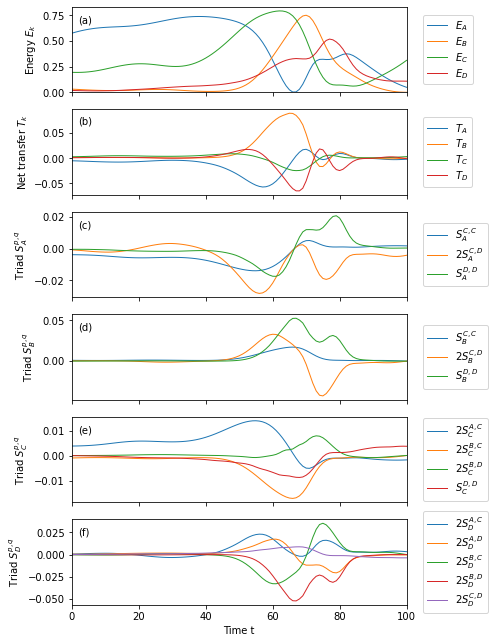

In [5]:
t_k = np.sum(np.sum(A_kpq,axis=3),axis=2) # Total transfer T_k

screening = 0.1 * np.max(abs(S_kpq))

### Fig. 3 ###
fig=plt.figure(figsize=[6,11])

ax = fig.add_subplot(611)
for k in range(4):
    ax.plot(energy[:,k],label="$E_{" + nodename[k] + "}$", linewidth=1)
ax.set_xlabel("Time t")
ax.set_ylabel("Energy $E_k$")
ax.set_ylim(0,None)
ax.set_xlim(0,100)
plt.xticks(color="None")
ax.text(2,0.67,'(a)')
ax.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, labelspacing=0.2)

ax = fig.add_subplot(612)
for k in range(4):
    ax.plot(t_k[:,k],label="$T_{" + nodename[k] + "}$", linewidth=1)
ax.set_xlabel("Time t")
ax.set_ylabel("Net transfer $T_k$")
ax.set_xlim(0,100)
plt.xticks(color="None")
ax.text(2,0.067,'(b)')
ax.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, labelspacing=0.2)

k=0
ax = fig.add_subplot(612+(k+1))
for p in range(4):
    for q in range(p,4):
        if (p!=q): # S_k^kq = S_k^qk,  S_k^pk = S_k^kp
            if np.max(abs(S_kpq[:,k,p,q])*2) > screening: # Screening for visibility
                ax.plot(S_kpq[:,k,p,q]*2,label="2$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
        else: # S_k^pq
            if np.max(abs(S_kpq[:,k,p,q])) > screening: # Screening for visibility
                ax.plot(S_kpq[:,k,p,q],label="$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
ax.set_xlabel("Time t")
ax.set_ylabel("Triad $S_{"+ nodename[k] + "}^{p,q}$")
ax.set_xlim(0,100)
plt.xticks(color="None")
ax.text(2,0.013,'(c)')
ax.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, labelspacing=0.2)

k=1
ax = fig.add_subplot(612+(k+1))
for p in range(4):
    for q in range(p,4):
        if (p!=q): # S_k^kq = S_k^qk,  S_k^pk = S_k^kp
            if np.max(abs(S_kpq[:,k,p,q])*2) > screening: # Screening for visibility
                ax.plot(S_kpq[:,k,p,q]*2,label="2$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
        else: # S_k^pq
            if np.max(abs(S_kpq[:,k,p,q])) > screening: # Screening for visibility
                ax.plot(S_kpq[:,k,p,q],label="$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
ax.set_xlabel("Time t")
ax.set_ylabel("Triad $S_{"+ nodename[k] + "}^{p,q}$")
ax.set_xlim(0,100)
plt.xticks(color="None")
ax.text(2,0.038,'(d)')
ax.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, labelspacing=0.2)

k=2
ax = fig.add_subplot(612+(k+1))
for p in range(4):
    for q in range(p,4):
        if (p!=q): # S_k^kq = S_k^qk,  S_k^pk = S_k^kp
            if np.max(abs(S_kpq[:,k,p,q])*2) > screening: # Screening for visibility
                #ax.plot(S_kpq[:,k,p,q]*2,label="J({}|{},{})*2".format(nodename[k],nodename[p],nodename[q]))
                ax.plot(S_kpq[:,k,p,q]*2,label="2$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
        else: # S_k^pq
            if np.max(abs(S_kpq[:,k,p,q])) > screening: # Screening for visibility
                #ax.plot(S_kpq[:,k,p,q],label="J({}|{},{})".format(nodename[k],nodename[p],nodename[q]))
                ax.plot(S_kpq[:,k,p,q],label="$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
ax.set_xlabel("Time t")
ax.set_ylabel("Triad $S_{"+ nodename[k] + "}^{p,q}$")
ax.set_xlim(0,100)
plt.xticks(color="None")
ax.text(2,0.009,'(e)')
ax.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, labelspacing=0.2)

k=3
ax = fig.add_subplot(612+(k+1))
for p in range(4):
    for q in range(p,4):
        if (p!=q): # S_k^kq = S_k^qk,  S_k^pk = S_k^kp
            if np.max(abs(S_kpq[:,k,p,q])*2) > screening: # Screening for visibility
                #ax.plot(S_kpq[:,k,p,q]*2,label="J({}|{},{})*2".format(nodename[k],nodename[p],nodename[q]))
                ax.plot(S_kpq[:,k,p,q]*2,label="2$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
        else: # S_k^pq
            if np.max(abs(S_kpq[:,k,p,q])) > screening: # Screening for visibility
                #ax.plot(S_kpq[:,k,p,q],label="J({}|{},{})".format(nodename[k],nodename[p],nodename[q]))
                ax.plot(S_kpq[:,k,p,q],label="$S_{" + nodename[k] + "}^{" + nodename[p] + "," + nodename[q] + "}$", linewidth=1)
ax.set_xlabel("Time t")
ax.set_ylabel("Triad $S_{"+ nodename[k] + "}^{p,q}$")
ax.set_xlim(0,100)
plt.xticks(color="k")
ax.text(2,0.022,'(f)')
ax.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, labelspacing=0.2)

#fig.savefig("fig3.pdf", bbox_inches="tight")
plt.show()
plt.close(fig)

# 5. Network visualization, Fig. 4 in Ref. [1]
Since the relative amplitude of energy transfer is expressed by the width of arrows, normalization is recommended before the plot.

In [6]:
# Normalization for plot
S_kpq_max = np.max(abs(S_kpq))
A_kpq = A_kpq / S_kpq_max
S_kpq = S_kpq / S_kpq_max
D_kpq = D_kpq / S_kpq_max
energy_max = np.max(abs(energy))
energy = energy / energy_max

## 5.1 Visualization of symmetrized triad transfer $S_k^{p,q}$

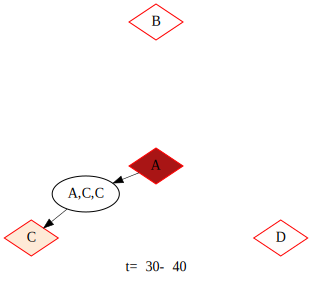

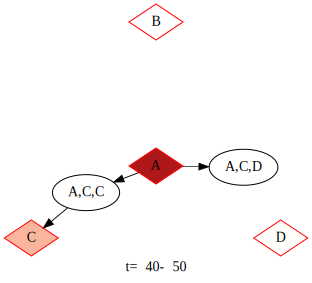

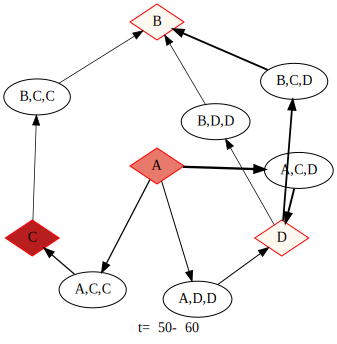

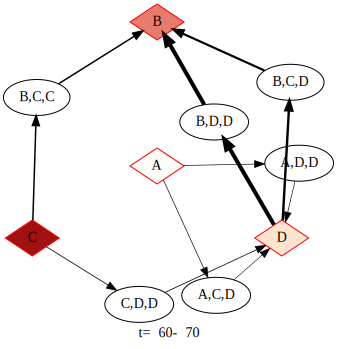

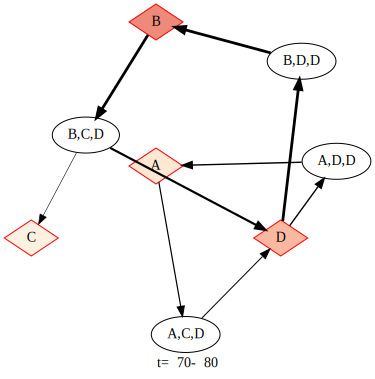

In [7]:
# for i in range(S_kpq.shape[0]):
#     triadgraph_symmetric_all(S_kpq[i,:,:,:],output="png/symmetric_jkpq_t{0:08d}.png".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[i,:])
#     triadgraph_symmetric_all(S_kpq[i,:,:,:],output="dot/symmetric_jkpq_t{0:08d}.dot".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[i,:])
for i in range(3,8,1):
    triadgraph_symmetric_all(np.average(S_kpq[i*10:(i+1)*10,:,:,:],axis=0),title="t={:4d}-{:4d}".format(i*10,(i+1)*10),nodename=nodename,energy=np.average(energy[i*10:(i+1)*10,:],axis=0))

## 5.2 Visualization of directional representation $D_{k \leftarrow q}^p$
We propose the directional representation which looks qualitatively similar to the symmetrized triad transfer.

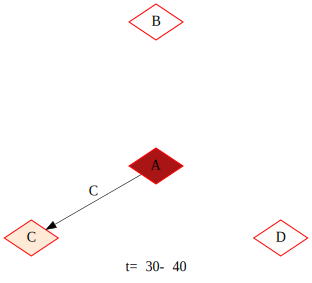

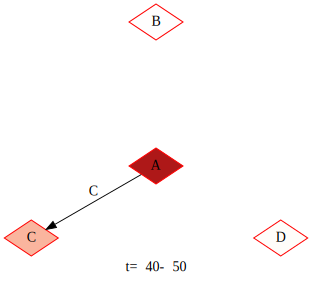

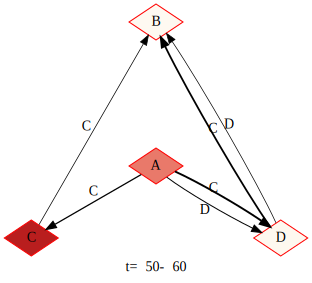

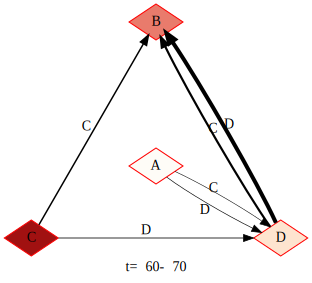

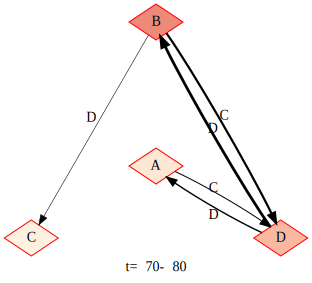

In [8]:
# for i in range(D_kpq.shape[0]):
#     triadgraph_directional_all(D_kpq[i,:,:,:],output="png/directional_dkpq_t{0:08d}.png".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[i,:])
#     triadgraph_directional_all(D_kpq[i,:,:,:],output="dot/directional_dkpq_t{0:08d}.dot".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[i,:])
for i in range(3,8,1):
    triadgraph_directional_all(np.average(D_kpq[i*10:(i+1)*10,:,:,:],axis=0),title="t={:4d}-{:4d}".format(i*10,(i+1)*10),nodename=nodename,energy=np.average(energy[i*10:(i+1)*10,:],axis=0))

## 5.3 Visualization of non-symmetrized triad transfer $A_k^{p,q}$
One may observe fictitious interactions and qualitatively different interpretation from the symmetrized transfer.

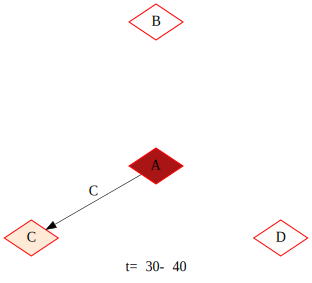

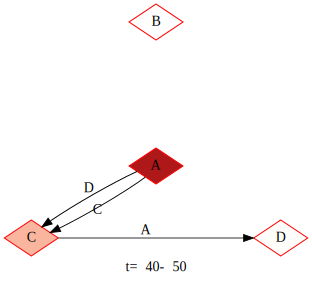

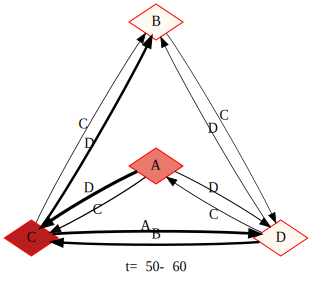

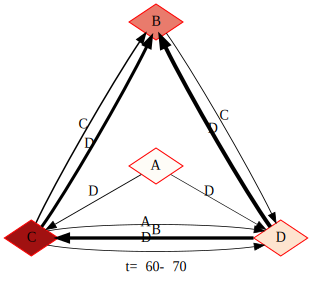

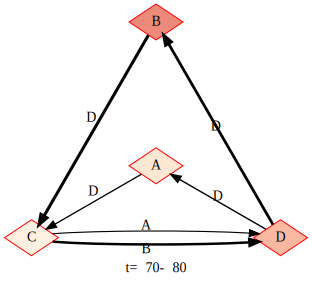

In [9]:
temp_A_kpq = np.transpose(A_kpq,axes=(0,1,3,2)) # Rearranged for plotting by triadgraph_directional_all
# for i in range(temp_A_kpq.shape[0]):
#     triadgraph_directional_all(temp_A_kpq[i,:,:,:],output="png/asymmetric_akpq_t{0:08d}.png".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[i,:])
#     triadgraph_directional_all(temp_A_kpq[i,:,:,:],output="dot/asymmetric_akpq_t{0:08d}.dot".format(i),title="t={:4d}".format(i),nodename=nodename,energy=energy[i,:])
for i in range(3,8,1):
    triadgraph_directional_all(np.average(temp_A_kpq[i*10:(i+1)*10,:,:,:],axis=0),title="t={:4d}-{:4d}".format(i*10,(i+1)*10),nodename=nodename,energy=np.average(energy[i*10:(i+1)*10,:],axis=0))

# 6. Contracted mode-to-mode transfer, Fig. 5 in Ref. [1]
$D_{k \leftarrow q} = \sum_p D_{k \leftarrow q}^p$, which could be repraced by the mode-to-mode transfer summed over the index of the mediator $p$, often plotted in the non-symmetrized tranfer analysis.

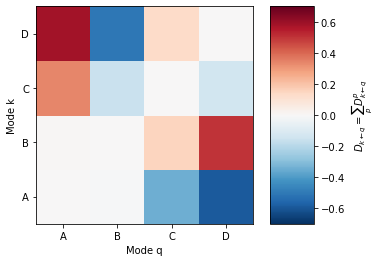

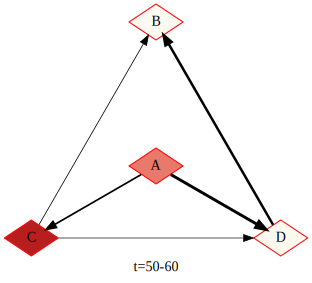

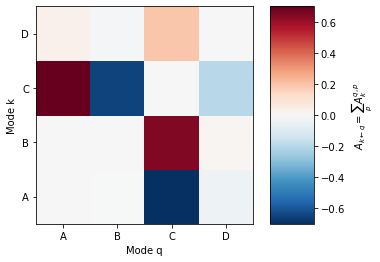

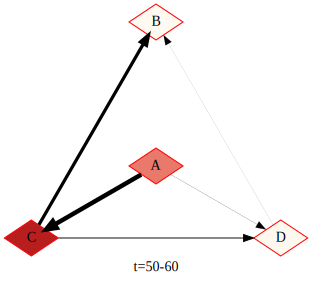

In [10]:
### Mode-to-mode energy transfer calculated by the directional representation D_{k<-q}^p ###
contracted_d_kq=np.sum(D_kpq[:,:,:,:],axis=2) # D_kpq[time,k,p,q]

fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.pcolormesh(np.arange(4),np.arange(4),np.average(contracted_d_kq[50:60,:,:],axis=0),
                     cmap="RdBu_r",shading="auto",vmax=0.7,vmin=-0.7)
ax.set_xlabel("Mode q")
ax.set_ylabel("Mode k")
ax.set_xticks(list(np.arange(4)))
ax.set_xticklabels(nodename)
ax.set_yticks(list(np.arange(4)))
ax.set_yticklabels(nodename)
ax.set_aspect('equal', adjustable='box')
cbar = fig.colorbar(surf,aspect=5)
cbar.set_label(r"$D_{k \leftarrow q}=\sum_p D_{k \leftarrow q}^p$")
plt.show()

triadgraph_mode2mode_all(np.average(contracted_d_kq[50:60,:,:],axis=0),title="t=50-60",screening=0.01,nodename=nodename,energy=np.average(energy[50:60,:],axis=0))


### Mode-to-mode energy transfer calculated by the non-symmetrized triad transfer A_k^pq ###
contracted_A_kq=np.sum(temp_A_kpq[:,:,:,:],axis=2) # temp_A_kpq[time,k,p,q], and p is a mediator

fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.pcolormesh(np.arange(4),np.arange(4),np.average(contracted_A_kq[50:60,:,:],axis=0),
                     cmap="RdBu_r",shading="auto",vmax=0.7,vmin=-0.7)
ax.set_xlabel("Mode q")
ax.set_ylabel("Mode k")
ax.set_xticks(list(np.arange(4)))
ax.set_xticklabels(nodename)
ax.set_yticks(list(np.arange(4)))
ax.set_yticklabels(nodename)
ax.set_aspect('equal', adjustable='box')
cbar = fig.colorbar(surf,aspect=5)
cbar.set_label(r"$A_{k \leftarrow q}=\sum_p A_k^{q,p}$")
plt.show()

triadgraph_mode2mode_all(np.average(contracted_A_kq[50:60,:,:],axis=0),title="t=50-60",screening=0.01,nodename=nodename,energy=np.average(energy[50:60,:],axis=0))